In [144]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from collections import defaultdict

from matplotlib.ticker import FormatStrFormatter

import json
from numpy import array
import matplotlib.patches as mpatches

import matplotlib.cm as cm

path = Path.cwd()/'logs/cifar10ddp'
path

logfiles = [f for f in path.iterdir() if '.DS_Store' not in f.name]
logfiles

[PosixPath('/Users/davoodwadi/code/logs/cifar10ddp/Adam_0.01_2_1024.json'),
 PosixPath('/Users/davoodwadi/code/logs/cifar10ddp/Adam_0.001_2_4096.json'),
 PosixPath('/Users/davoodwadi/code/logs/cifar10ddp/ActiveAdam_0.1_2_64.json'),
 PosixPath('/Users/davoodwadi/code/logs/cifar10ddp/Adam_0.001_1_64.json'),
 PosixPath('/Users/davoodwadi/code/logs/cifar10ddp/Adam_0.1_1_64.json'),
 PosixPath('/Users/davoodwadi/code/logs/cifar10ddp/Adam_0.0001_1_1024.json'),
 PosixPath('/Users/davoodwadi/code/logs/cifar10ddp/Adam_0.1_0_32.json'),
 PosixPath('/Users/davoodwadi/code/logs/cifar10ddp/Adam_0.001_0_32.json'),
 PosixPath('/Users/davoodwadi/code/logs/cifar10ddp/ActiveAdam_1e-05_1_256.json'),
 PosixPath('/Users/davoodwadi/code/logs/cifar10ddp/ActiveAdam_1e-05_0_256.json'),
 PosixPath('/Users/davoodwadi/code/logs/cifar10ddp/ActiveAdam_1e-05_0_128.json'),
 PosixPath('/Users/davoodwadi/code/logs/cifar10ddp/ActiveAdam_1e-05_1_128.json'),
 PosixPath('/Users/davoodwadi/code/logs/cifar10ddp/Adam_0.0001_0_5

In [145]:
def get_meta(filepath):
    optim = filepath.stem.split('_')[0]
    lr = float(filepath.stem.split('_')[1])
    runNo = int(filepath.stem.split('_')[2])
    batch_size = int(filepath.stem.split('_')[3])
    return optim, lr, runNo, batch_size

class Log:
    def __init__(self, filePath):
        self.filePath = filePath
        self.open_file()
#         self.process_raw()
        self.get_accs()
        
#     def process_raw(self):
#         self.log = self.log.split('\n')
#         self.log = [l for l in self.log if 'acc' in l]
#         self.log = [d.split(',')[:3] for d in self.log]
    
    def open_file(self):
        with open(self.filePath, 'r') as f:
            self.log = json.load(f)
            self.optim = self.filePath.stem.split('_')[0]
            self.lr = float(self.filePath.stem.split('_')[1])
            self.runNo = int(self.filePath.stem.split('_')[2])
            self.batch_size = int(self.filePath.stem.split('_')[3])


        
    def get_accs(self):
        self.train_losses = array(self.log['train_losses'])
        self.accs = array(self.log['accs'])
        self.epoch = array(self.log['epochs'])
        

def min_epoch(logs):
    mini = float('inf')
    for optim in logs.keys():
        for lr in logs[optim].keys():
            for batch_size in logs[optim][lr].keys():
                for runNo in logs[optim][lr][batch_size].keys():
                    if len(logs[optim][lr][batch_size][runNo].epoch)<mini: 
                        mini=len(logs[optim][lr][batch_size][runNo].epoch)
                        opt = optim
                        LR = lr
                        batch = batch_size
                        run = runNo
    return mini, (opt, LR, batch, run)

In [146]:
l = lambda : defaultdict(dict)
logs = defaultdict(l)
for file in logfiles:
    optim, lr, runNo, batch_size = get_meta(file)
    if optim not in logs.keys(): logs[optim] = defaultdict(l)
    if lr not in logs[optim].keys(): logs[optim][lr] = defaultdict(l)
#     logs[optim][lr][batch_size] = defaultdict(l)
    logs[optim][lr][batch_size][runNo] = Log(file)

In [147]:
logs

defaultdict(<function __main__.<lambda>()>,
            {'Adam': defaultdict(<function __main__.<lambda>()>,
                         {0.01: defaultdict(<function __main__.<lambda>()>,
                                      {1024: defaultdict(dict,
                                                   {2: <__main__.Log at 0x7faa20d9ed30>,
                                                    0: <__main__.Log at 0x7faa2460c2e0>,
                                                    1: <__main__.Log at 0x7faa21d041c0>}),
                                       512: defaultdict(dict,
                                                   {0: <__main__.Log at 0x7faa2460ca90>,
                                                    1: <__main__.Log at 0x7faa2460cbe0>,
                                                    2: <__main__.Log at 0x7faa21d04430>}),
                                       64: defaultdict(dict,
                                                   {1: <__main__.Log at 0x7faa2460c3d0>,
  

In [112]:
mini = min_epoch(logs)
mini

(3, ('ActiveAdam', 1e-05, 64, 2))

# compare high and low batch sizes

In [113]:
def getmean(log):
    mean=[]
    for run in log.keys():
        if len(log[run].accs)==100: mean.append(log[run].accs)
    meanarr = np.array(mean)
    return meanarr.mean(0), meanarr.std(0)

In [119]:
len(logs[optim][lr][batch_sizeL][0].accs)

100

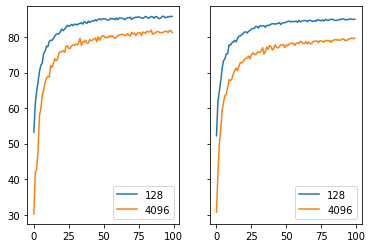

In [133]:
fig, ax = plt.subplots(1,2, sharey=True)
optim = 'ActiveAdam'
lr = 0.001
batch_sizeL = 32
batch_sizeH = 1024
ax[0].plot(getmean(logs[optim][lr][batch_sizeL])[0], label=batch_sizeL*4)
ax[0].plot(getmean(logs[optim][lr][batch_sizeH])[0], label=batch_sizeH*4)

optim = 'Adam'
ax[1].plot(getmean(logs[optim][lr][batch_sizeL])[0], label=batch_sizeL*4)
ax[1].plot(getmean(logs[optim][lr][batch_sizeH])[0], label=batch_sizeH*4)
for a in ax.flat: a.legend() 

Bigger batch sizes

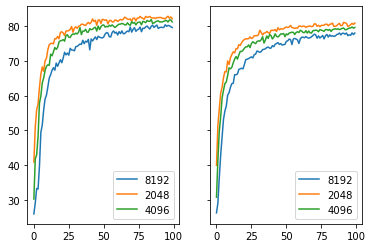

In [155]:
fig, ax = plt.subplots(1,2, sharey=True)
optim = 'ActiveAdam'
lr = 0.001
batch_sizeL = 2048
batch_sizeM = 512
batch_sizeH = 1024
ax[0].plot(getmean(logs[optim][lr][batch_sizeL])[0], label=batch_sizeL*4)
ax[0].plot(getmean(logs[optim][lr][batch_sizeM])[0], label=batch_sizeM*4)
ax[0].plot(getmean(logs[optim][lr][batch_sizeH])[0], label=batch_sizeH*4)

optim = 'Adam'
ax[1].plot(getmean(logs[optim][lr][batch_sizeL])[0], label=batch_sizeL*4)
ax[1].plot(getmean(logs[optim][lr][batch_sizeM])[0], label=batch_sizeM*4)
ax[1].plot(getmean(logs[optim][lr][batch_sizeH])[0], label=batch_sizeH*4)
for a in ax.flat: a.legend() 

In [152]:
getmean(logs['ActiveAdam'][lr][4096])[0].max(), getmean(logs['Adam'][lr][4096])[0].max()

(76.90666198730469, 75.99333190917969)

In [153]:
getmean(logs['ActiveAdam'][lr][2048])[0].max(), getmean(logs['Adam'][lr][2048])[0].max()

(80.45333353678386, 78.11000061035156)

In [154]:
getmean(logs['ActiveAdam'][lr][1024])[0].max(), getmean(logs['Adam'][lr][1024])[0].max()

(81.97666422526042, 79.8199971516927)

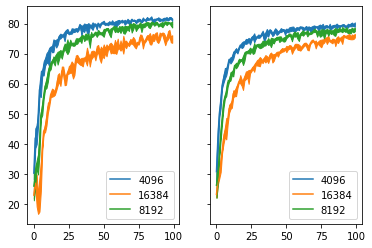

In [156]:
fig, ax = plt.subplots(1,2, sharey=True)
optim = 'ActiveAdam'
lr = 0.001
batch_sizeL = 1024
batch_sizeH = 4096
batch_size = 2048



mean = getmean(logs[optim][lr][batch_sizeL])[0]
std = getmean(logs[optim][lr][batch_sizeL])[1]
l, =ax[0].plot(mean, label=batch_sizeL*4)
c = l.get_color()
ax[0].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_sizeH])[0]
std = getmean(logs[optim][lr][batch_sizeH])[1]
l, =ax[0].plot(mean, label=batch_sizeH*4)
c = l.get_color()
ax[0].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_size])[0]
std = getmean(logs[optim][lr][batch_size])[1]
l, =ax[0].plot(mean, label=batch_size*4)
c = l.get_color()
ax[0].fill_between(range(100), mean-std, mean+std, color=c)

optim = 'Adam'
mean = getmean(logs[optim][lr][batch_sizeL])[0]
std = getmean(logs[optim][lr][batch_sizeL])[1]
l, =ax[1].plot(mean, label=batch_sizeL*4)
c = l.get_color()
ax[1].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_sizeH])[0]
std = getmean(logs[optim][lr][batch_sizeH])[1]
l, =ax[1].plot(mean, label=batch_sizeH*4)
c = l.get_color()
ax[1].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_size])[0]
std = getmean(logs[optim][lr][batch_size])[1]
l, =ax[1].plot(mean, label=batch_size*4)
c = l.get_color()
ax[1].fill_between(range(100), mean-std, mean+std, color=c)


for a in ax.flat: a.legend() 

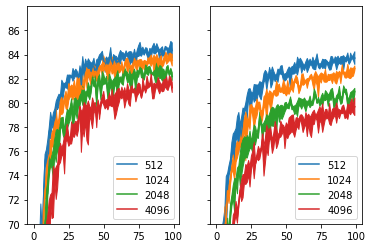

In [163]:
fig, ax = plt.subplots(1,2, sharey=True)
optim = 'ActiveAdam'
lr = 0.001
batch_sizeL = 128
batch_sizeH = 256
batch_size = 512
bs = 1024



mean = getmean(logs[optim][lr][batch_sizeL])[0]
std = getmean(logs[optim][lr][batch_sizeL])[1]
l, =ax[0].plot(mean, label=batch_sizeL*4)
c = l.get_color()
ax[0].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_sizeH])[0]
std = getmean(logs[optim][lr][batch_sizeH])[1]
l, =ax[0].plot(mean, label=batch_sizeH*4)
c = l.get_color()
ax[0].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_size])[0]
std = getmean(logs[optim][lr][batch_size])[1]
l, =ax[0].plot(mean, label=batch_size*4)
c = l.get_color()
ax[0].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][bs])[0]
std = getmean(logs[optim][lr][bs])[1]
l, =ax[0].plot(mean, label=bs*4)
c = l.get_color()
ax[0].fill_between(range(100), mean-std, mean+std, color=c)

optim = 'Adam'
mean = getmean(logs[optim][lr][batch_sizeL])[0]
std = getmean(logs[optim][lr][batch_sizeL])[1]
l, =ax[1].plot(mean, label=batch_sizeL*4)
c = l.get_color()
ax[1].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_sizeH])[0]
std = getmean(logs[optim][lr][batch_sizeH])[1]
l, =ax[1].plot(mean, label=batch_sizeH*4)
c = l.get_color()
ax[1].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_size])[0]
std = getmean(logs[optim][lr][batch_size])[1]
l, =ax[1].plot(mean, label=batch_size*4)
c = l.get_color()
ax[1].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][bs])[0]
std = getmean(logs[optim][lr][bs])[1]
l, =ax[1].plot(mean, label=bs*4)
c = l.get_color()
ax[1].fill_between(range(100), mean-std, mean+std, color=c)


for a in ax.flat: 
    a.set_ylim(bottom=70)
    a.legend() 

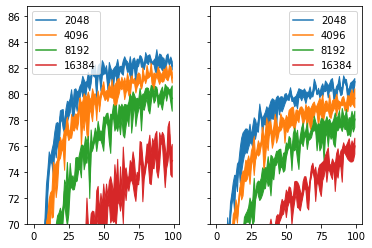

In [165]:
fig, ax = plt.subplots(1,2, sharey=True)
optim = 'ActiveAdam'
lr = 0.001
batch_sizeL = 512
batch_sizeH = 1024
batch_size = 2048
bs = 4096



mean = getmean(logs[optim][lr][batch_sizeL])[0]
std = getmean(logs[optim][lr][batch_sizeL])[1]
l, =ax[0].plot(mean, label=batch_sizeL*4)
c = l.get_color()
ax[0].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_sizeH])[0]
std = getmean(logs[optim][lr][batch_sizeH])[1]
l, =ax[0].plot(mean, label=batch_sizeH*4)
c = l.get_color()
ax[0].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_size])[0]
std = getmean(logs[optim][lr][batch_size])[1]
l, =ax[0].plot(mean, label=batch_size*4)
c = l.get_color()
ax[0].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][bs])[0]
std = getmean(logs[optim][lr][bs])[1]
l, =ax[0].plot(mean, label=bs*4)
c = l.get_color()
ax[0].fill_between(range(100), mean-std, mean+std, color=c)

optim = 'Adam'
mean = getmean(logs[optim][lr][batch_sizeL])[0]
std = getmean(logs[optim][lr][batch_sizeL])[1]
l, =ax[1].plot(mean, label=batch_sizeL*4)
c = l.get_color()
ax[1].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_sizeH])[0]
std = getmean(logs[optim][lr][batch_sizeH])[1]
l, =ax[1].plot(mean, label=batch_sizeH*4)
c = l.get_color()
ax[1].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_size])[0]
std = getmean(logs[optim][lr][batch_size])[1]
l, =ax[1].plot(mean, label=batch_size*4)
c = l.get_color()
ax[1].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][bs])[0]
std = getmean(logs[optim][lr][bs])[1]
l, =ax[1].plot(mean, label=bs*4)
c = l.get_color()
ax[1].fill_between(range(100), mean-std, mean+std, color=c)


for a in ax.flat: 
    a.set_ylim(bottom=70)
    a.legend() 

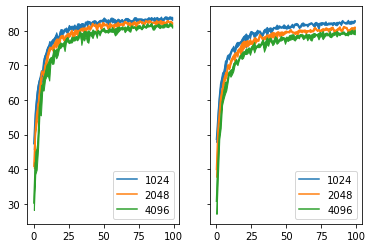

In [158]:
fig, ax = plt.subplots(1,2, sharey=True)
optim = 'ActiveAdam'
lr = 0.001
batch_sizeL = 256
batch_sizeH = 512
batch_size = 1024



mean = getmean(logs[optim][lr][batch_sizeL])[0]
std = getmean(logs[optim][lr][batch_sizeL])[1]
l, =ax[0].plot(mean, label=batch_sizeL*4)
c = l.get_color()
ax[0].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_sizeH])[0]
std = getmean(logs[optim][lr][batch_sizeH])[1]
l, =ax[0].plot(mean, label=batch_sizeH*4)
c = l.get_color()
ax[0].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_size])[0]
std = getmean(logs[optim][lr][batch_size])[1]
l, =ax[0].plot(mean, label=batch_size*4)
c = l.get_color()
ax[0].fill_between(range(100), mean-std, mean+std, color=c)

optim = 'Adam'
mean = getmean(logs[optim][lr][batch_sizeL])[0]
std = getmean(logs[optim][lr][batch_sizeL])[1]
l, =ax[1].plot(mean, label=batch_sizeL*4)
c = l.get_color()
ax[1].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_sizeH])[0]
std = getmean(logs[optim][lr][batch_sizeH])[1]
l, =ax[1].plot(mean, label=batch_sizeH*4)
c = l.get_color()
ax[1].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_size])[0]
std = getmean(logs[optim][lr][batch_size])[1]
l, =ax[1].plot(mean, label=batch_size*4)
c = l.get_color()
ax[1].fill_between(range(100), mean-std, mean+std, color=c)


for a in ax.flat: a.legend() 

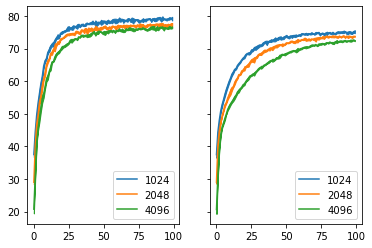

In [143]:
fig, ax = plt.subplots(1,2, sharey=True)
optim = 'ActiveAdam'
lr = 0.0001
batch_sizeL = 256
batch_sizeH = 512
batch_size = 1024



mean = getmean(logs[optim][lr][batch_sizeL])[0]
std = getmean(logs[optim][lr][batch_sizeL])[1]
l, =ax[0].plot(mean, label=batch_sizeL*4)
c = l.get_color()
ax[0].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_sizeH])[0]
std = getmean(logs[optim][lr][batch_sizeH])[1]
l, =ax[0].plot(mean, label=batch_sizeH*4)
c = l.get_color()
ax[0].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_size])[0]
std = getmean(logs[optim][lr][batch_size])[1]
l, =ax[0].plot(mean, label=batch_size*4)
c = l.get_color()
ax[0].fill_between(range(100), mean-std, mean+std, color=c)

optim = 'Adam'
mean = getmean(logs[optim][lr][batch_sizeL])[0]
std = getmean(logs[optim][lr][batch_sizeL])[1]
l, =ax[1].plot(mean, label=batch_sizeL*4)
c = l.get_color()
ax[1].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_sizeH])[0]
std = getmean(logs[optim][lr][batch_sizeH])[1]
l, =ax[1].plot(mean, label=batch_sizeH*4)
c = l.get_color()
ax[1].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_size])[0]
std = getmean(logs[optim][lr][batch_size])[1]
l, =ax[1].plot(mean, label=batch_size*4)
c = l.get_color()
ax[1].fill_between(range(100), mean-std, mean+std, color=c)


for a in ax.flat: a.legend() 

In [137]:
logs[optim][lr].keys()

dict_keys([64, 32, 512, 1024, 128, 256])

big and small batch sizes

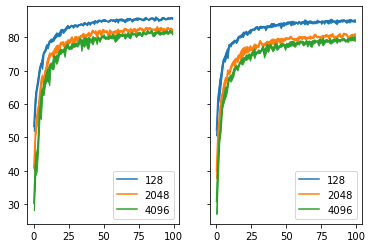

In [135]:
fig, ax = plt.subplots(1,2, sharey=True)
optim = 'ActiveAdam'
lr = 0.001
batch_sizeL = 32
batch_sizeH = 512
batch_size = 1024



mean = getmean(logs[optim][lr][batch_sizeL])[0]
std = getmean(logs[optim][lr][batch_sizeL])[1]
l, =ax[0].plot(mean, label=batch_sizeL*4)
c = l.get_color()
ax[0].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_sizeH])[0]
std = getmean(logs[optim][lr][batch_sizeH])[1]
l, =ax[0].plot(mean, label=batch_sizeH*4)
c = l.get_color()
ax[0].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_size])[0]
std = getmean(logs[optim][lr][batch_size])[1]
l, =ax[0].plot(mean, label=batch_size*4)
c = l.get_color()
ax[0].fill_between(range(100), mean-std, mean+std, color=c)

optim = 'Adam'
mean = getmean(logs[optim][lr][batch_sizeL])[0]
std = getmean(logs[optim][lr][batch_sizeL])[1]
l, =ax[1].plot(mean, label=batch_sizeL*4)
c = l.get_color()
ax[1].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_sizeH])[0]
std = getmean(logs[optim][lr][batch_sizeH])[1]
l, =ax[1].plot(mean, label=batch_sizeH*4)
c = l.get_color()
ax[1].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_size])[0]
std = getmean(logs[optim][lr][batch_size])[1]
l, =ax[1].plot(mean, label=batch_size*4)
c = l.get_color()
ax[1].fill_between(range(100), mean-std, mean+std, color=c)


for a in ax.flat: a.legend() 

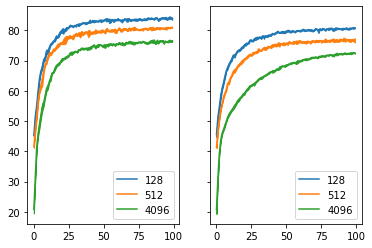

In [120]:
fig, ax = plt.subplots(1,2, sharey=True)
optim = 'ActiveAdam'
lr = 0.0001
batch_sizeL = 32
batch_sizeH = 128
batch_size = 1024



mean = getmean(logs[optim][lr][batch_sizeL])[0]
std = getmean(logs[optim][lr][batch_sizeL])[1]
l, =ax[0].plot(mean, label=batch_sizeL*4)
c = l.get_color()
ax[0].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_sizeH])[0]
std = getmean(logs[optim][lr][batch_sizeH])[1]
l, =ax[0].plot(mean, label=batch_sizeH*4)
c = l.get_color()
ax[0].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_size])[0]
std = getmean(logs[optim][lr][batch_size])[1]
l, =ax[0].plot(mean, label=batch_size*4)
c = l.get_color()
ax[0].fill_between(range(100), mean-std, mean+std, color=c)

optim = 'Adam'
mean = getmean(logs[optim][lr][batch_sizeL])[0]
std = getmean(logs[optim][lr][batch_sizeL])[1]
l, =ax[1].plot(mean, label=batch_sizeL*4)
c = l.get_color()
ax[1].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_sizeH])[0]
std = getmean(logs[optim][lr][batch_sizeH])[1]
l, =ax[1].plot(mean, label=batch_sizeH*4)
c = l.get_color()
ax[1].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_size])[0]
std = getmean(logs[optim][lr][batch_size])[1]
l, =ax[1].plot(mean, label=batch_size*4)
c = l.get_color()
ax[1].fill_between(range(100), mean-std, mean+std, color=c)


for a in ax.flat: a.legend() 

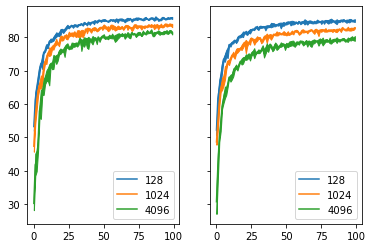

In [106]:
fig, ax = plt.subplots(1,2, sharey=True)
optim = 'ActiveAdam'
lr = 0.001
batch_sizeL = 32
batch_sizeH = 256
batch_size = 1024



mean = getmean(logs[optim][lr][batch_sizeL])[0]
std = getmean(logs[optim][lr][batch_sizeL])[1]
l, =ax[0].plot(mean, label=batch_sizeL*4)
c = l.get_color()
ax[0].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_sizeH])[0]
std = getmean(logs[optim][lr][batch_sizeH])[1]
l, =ax[0].plot(mean, label=batch_sizeH*4)
c = l.get_color()
ax[0].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_size])[0]
std = getmean(logs[optim][lr][batch_size])[1]
l, =ax[0].plot(mean, label=batch_size*4)
c = l.get_color()
ax[0].fill_between(range(100), mean-std, mean+std, color=c)

optim = 'Adam'
mean = getmean(logs[optim][lr][batch_sizeL])[0]
std = getmean(logs[optim][lr][batch_sizeL])[1]
l, =ax[1].plot(mean, label=batch_sizeL*4)
c = l.get_color()
ax[1].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_sizeH])[0]
std = getmean(logs[optim][lr][batch_sizeH])[1]
l, =ax[1].plot(mean, label=batch_sizeH*4)
c = l.get_color()
ax[1].fill_between(range(100), mean-std, mean+std, color=c)

mean = getmean(logs[optim][lr][batch_size])[0]
std = getmean(logs[optim][lr][batch_size])[1]
l, =ax[1].plot(mean, label=batch_size*4)
c = l.get_color()
ax[1].fill_between(range(100), mean-std, mean+std, color=c)


for a in ax.flat: a.legend() 

/var/folders/jv/ppbxly7j7vzgcr8sdv78s2hr0000gn/T/ipykernel_55375/2443495980.py:6: RuntimeWarning: Mean of empty slice.
  return meanarr.mean(0)
/Users/davoodwadi/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/jv/ppbxly7j7vzgcr8sdv78s2hr0000gn/T/ipykernel_55375/2443495980.py:6: RuntimeWarning: Mean of empty slice.
  return meanarr.mean(0)
/Users/davoodwadi/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


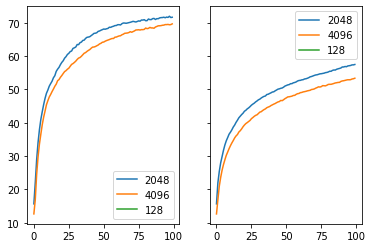

In [87]:
fig, ax = plt.subplots(1,2, sharey=True)
optim = 'ActiveAdam'
lr = 1e-5
batch_size = 32
batch_sizeL = 512
batch_sizeH = 1024
ax[0].plot(getmean(logs[optim][lr][batch_sizeL]), label=batch_sizeL*4)
ax[0].plot(getmean(logs[optim][lr][batch_sizeH]), label=batch_sizeH*4)
ax[0].plot(getmean(logs[optim][lr][batch_size]), label=batch_size*4)
optim = 'Adam'
ax[1].plot(getmean(logs[optim][lr][batch_sizeL]), label=batch_sizeL*4)
ax[1].plot(getmean(logs[optim][lr][batch_sizeH]), label=batch_sizeH*4)
ax[1].plot(getmean(logs[optim][lr][batch_size]), label=batch_size*4)
for a in ax.flat: a.legend() 

## testing grouped plots

/var/folders/jv/ppbxly7j7vzgcr8sdv78s2hr0000gn/T/ipykernel_55375/472247011.py:18: RuntimeWarning: Mean of empty slice.
  means = np.array(mean).mean(0)
/Users/davoodwadi/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/jv/ppbxly7j7vzgcr8sdv78s2hr0000gn/T/ipykernel_55375/472247011.py:18: RuntimeWarning: Mean of empty slice.
  means = np.array(mean).mean(0)
/Users/davoodwadi/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/jv/ppbxly7j7vzgcr8sdv78s2hr0000gn/T/ipykernel_55375/472247011.py:18: RuntimeWarning: Mean of empty slice.
  means = np.array(mean).mean(0)
/Users/davoodwadi/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount

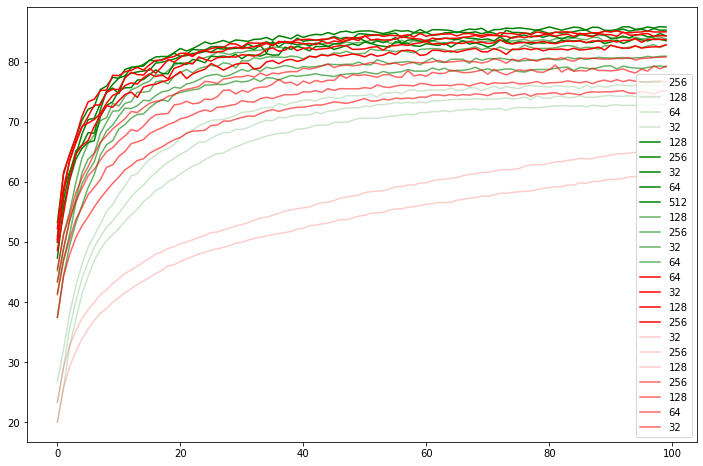

In [25]:
fig, ax = plt.subplots(2,2, figsize=(12,8))
optims = ['ActiveAdam', 'Adam']
colors = ['green','red']
alphas={
    0.001:1,
    0.0001:.6,
    1e-5:.2
}
accs=[]

for i, (optim, color) in enumerate(zip(optims, colors)):
    for lr in logs[optim].keys():
#         if lr==1e-5: continue
        for batch_size in logs[optim][lr].keys():
            mean=[] 
            for runNo in logs[optim][lr][batch_size].keys():
                if len(logs[optim][lr][batch_size][runNo].accs)==100:
                    mean.append(logs[optim][lr][batch_size][runNo].accs)
            means = np.array(mean).mean(0)
            
            ax.plot(means, color=color, alpha=alphas[lr], label=batch_size)
#         else:
#             ax.plot(r0, color=color, label=lr)
        
#         ax.plot(r0, label='optim')
#         r1 = logs[optim][lr][1].accs[:mini]
#         r2 = logs[optim][lr][2].accs[:mini]
#         r3 = logs[optim][lr][3].accs[:mini]
#         r4 = logs[optim][lr][4].accs[:mini]
#         r5 = logs[optim][lr][5].accs[:mini]
#         r6 = logs[optim][lr][6].accs[:mini]
ax.legend()
#         lrs = np.stack([r0])
#         logs[optim][lr]['mean'] = lrs.mean(0)
#         logs[optim][lr]['std'] = lrs.std(0)
#         logs[optim][lr]['min'] = lrs.min(0)
#         logs[optim][lr]['max'] = lrs.max(0)    


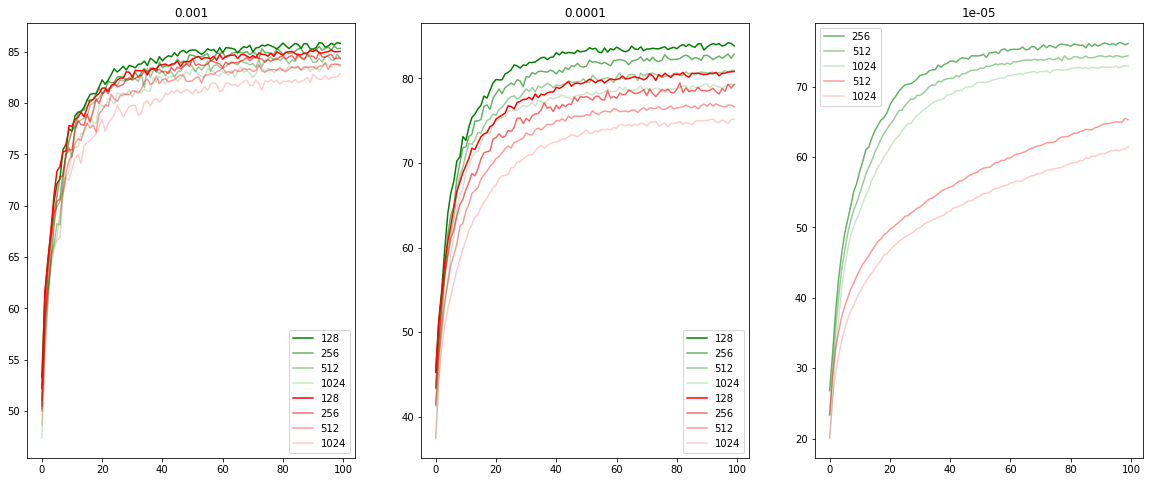

In [42]:
fig, axes = plt.subplots(1,3, figsize=(20,8))
axes = axes.flatten()
optims = ['ActiveAdam', 'Adam']
colors = ['green','red']
alphas={
    32:1,
    64:.6,
    128:.4,
    256:.2,
    512:.1
}
axdict={
    0.001: axes[0],
    0.0001: axes[1],
    1e-5: axes[2]
}
accs=[]

for i, (optim, color) in enumerate(zip(optims, colors)):
    for lr, ax  in zip(sorted(logs[optim].keys()), axes):
#         if lr==1e-5: continue
        for batch_size in sorted(logs[optim][lr].keys()):
            mean=[] 
            for runNo in logs[optim][lr][batch_size].keys():
                if len(logs[optim][lr][batch_size][runNo].accs)==100:
                    mean.append(logs[optim][lr][batch_size][runNo].accs)
            if len(mean)==0: continue
            means = np.array(mean).mean(0)
            
            axdict[lr].plot(means, color=color, alpha=alphas[batch_size], label=batch_size*4)

        axdict[lr].set_title(lr)
        axdict[lr].legend()

ActiveAdam:1e-05 68.03907047801547|10.24905912501782
ActiveAdam:0.0001 77.82972298940024|7.394933027028208
ActiveAdam:0.001 81.54514794667563|5.885587507057738
Adam:1e-05 53.86384860356648|8.690803597913765
Adam:0.0001 73.575306447347|7.205321137051844
Adam:0.001 80.75814788182576|5.594791661500683


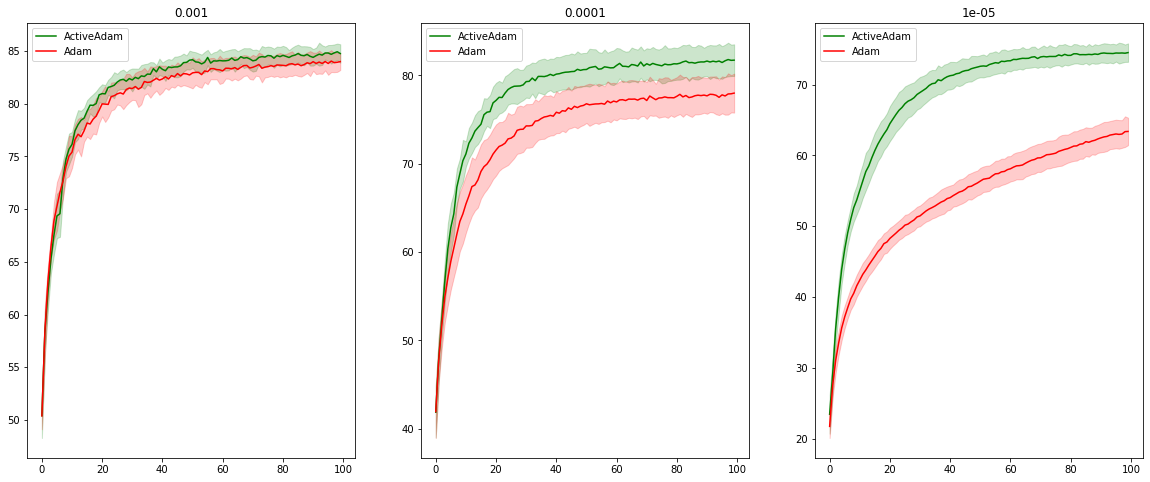

In [55]:
fig, axes = plt.subplots(1,3, figsize=(20,8))
axes = axes.flatten()
optims = ['ActiveAdam', 'Adam']
colors = ['green','red']
alphas={
    32:1,
    64:.6,
    128:.4,
    256:.2,
    512:.1
}
axdict={
    0.001: axes[0],
    0.0001: axes[1],
    1e-5: axes[2]
}
accs=[]

for i, (optim, color) in enumerate(zip(optims, colors)):
    for lr, ax  in zip(sorted(logs[optim].keys()), axes):
        
        batched=[]
        for batch_size in sorted(logs[optim][lr].keys()):
            mean=[] 
            for runNo in logs[optim][lr][batch_size].keys():
                if len(logs[optim][lr][batch_size][runNo].accs)==100:
                    mean.append(logs[optim][lr][batch_size][runNo].accs)
            if len(mean)==0: continue
            means = np.array(mean).mean(0)
            batched.append(means)
        batchmean = np.array(batched).mean(0)
        batchstd = np.array(batched).std(0)
        print(f'{optim}:{lr} {np.array(batched).mean()}|{np.array(batched).std()}')
        
        axdict[lr].plot(batchmean, color=color, label=optim)
        axdict[lr].fill_between(range(100), batchmean-batchstd, batchmean+batchstd, color=color, alpha=.2)
        axdict[lr].set_title(lr)
        axdict[lr].legend()

ActiveAdam 76.51060865257725|9.515909211005544
Adam 72.5061514523824|12.066310873513707


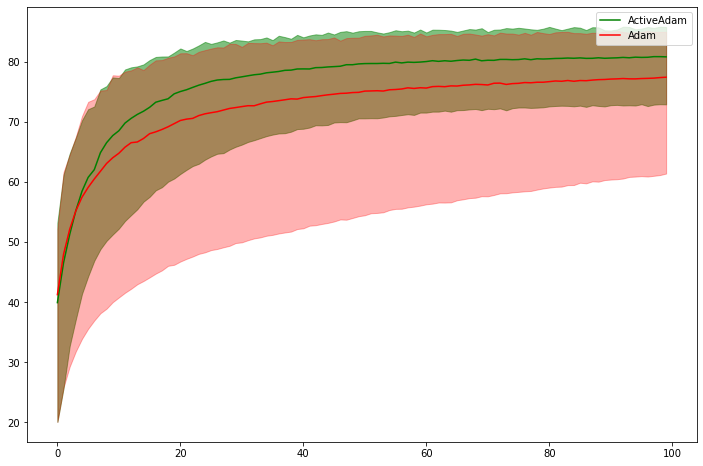

In [62]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
# axes = axes.flatten()
optims = ['ActiveAdam', 'Adam']
colors = ['green','red']
alphas={
    32:1,
    64:.6,
    128:.4,
    256:.2,
    512:.1
}

for i, (optim, color) in enumerate(zip(optims, colors)):
    accs=[]
    for lr  in sorted(logs[optim].keys()):    
        for batch_size in sorted(logs[optim][lr].keys()):
            mean=[] 
            for runNo in logs[optim][lr][batch_size].keys():
                if len(logs[optim][lr][batch_size][runNo].accs)==100:
                    mean.append(logs[optim][lr][batch_size][runNo].accs)
            if len(mean)==0: continue
            means = np.array(mean).mean(0)
            accs.append(means)
    batchmean = np.array(accs).mean(0)
    batchstd = np.array(accs).std(0)
    minn = np.array(accs).min(0)
    maxx = np.array(accs).max(0)
    print(f'{optim} {np.array(accs).mean()}|{np.array(accs).std()}')

    ax.plot(batchmean, color=color, label=optim)
    if optim=='ActiveAdam':
        alpha = .5
    else:
        alpha = .3
    ax.fill_between(range(100), minn, maxx, color=color, alpha=alpha)
#     ax.set_title(lr)
    ax.legend()

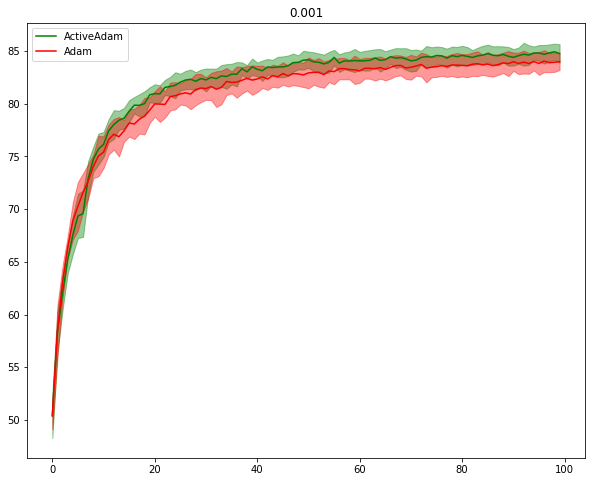

In [52]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
optims = ['ActiveAdam', 'Adam']
colors = ['green','red']
alphas={
    32:1,
    64:.6,
    128:.4,
    256:.2,
    512:.1
}

for i, (optim, color) in enumerate(zip(optims, colors)):
    for lr  in sorted(logs[optim].keys()):
        if lr!=0.001: continue
        batched=[]
        for batch_size in sorted(logs[optim][lr].keys()):
            mean=[] 
            for runNo in logs[optim][lr][batch_size].keys():
                if len(logs[optim][lr][batch_size][runNo].accs)==100:
                    mean.append(logs[optim][lr][batch_size][runNo].accs)
            if len(mean)==0: continue
            means = np.array(mean).mean(0)
            batched.append(means)
        batchmean = np.array(batched).mean(0)
        batchstd = np.array(batched).std(0)
        
        ax.plot(batchmean, color=color, label=optim)
        ax.fill_between(range(100), batchmean-batchstd, batchmean+batchstd, color=color, alpha=.4)
        ax.set_title(lr)
        ax.legend()

In [46]:
np.array(batched).shape

(4, 100)

In [29]:
axes.flatten().shape

(4,)

In [24]:
mean

[array([25.95999908, 32.59000015, 37.95000076]),
 array([26.28999901, 31.31999969, 37.79999924, 42.88999939, 46.23999786,
        48.73999786, 50.97999954, 53.75999832, 55.27000046, 56.11999893,
        57.97999954, 59.87999725, 60.81999969, 61.15999985, 62.44999695,
        63.72999954, 64.18000031, 65.11000061, 65.40000153, 66.31999969,
        67.34999847, 68.44999695, 68.62999725, 69.08999634, 69.55999756,
        70.26999664, 69.76999664, 70.50999451, 70.61000061, 70.94999695,
        71.52999878, 71.5       , 71.5       , 72.02999878, 72.20999908,
        72.44999695, 72.97999573, 72.75999451, 72.98999786, 73.47000122,
        73.62999725, 73.75999451, 73.70999908, 74.06999969, 74.04999542,
        73.95999908, 73.90999603, 74.26999664, 74.61999512, 74.36000061,
        74.37999725, 74.5       , 74.18000031, 74.95999908, 74.63999939,
        75.27999878, 74.97999573, 75.30999756, 75.72000122, 75.40999603,
        75.63999939, 75.5       , 75.77999878, 75.56999969, 75.88999939,
  

In [10]:
accsArr = np.array(accs)
accsArr.shape

(7, 100)

In [12]:
accsArr.max(1).mean()

85.82142748151507

In [14]:
accsArr.mean(0).max()

85.44428362165179

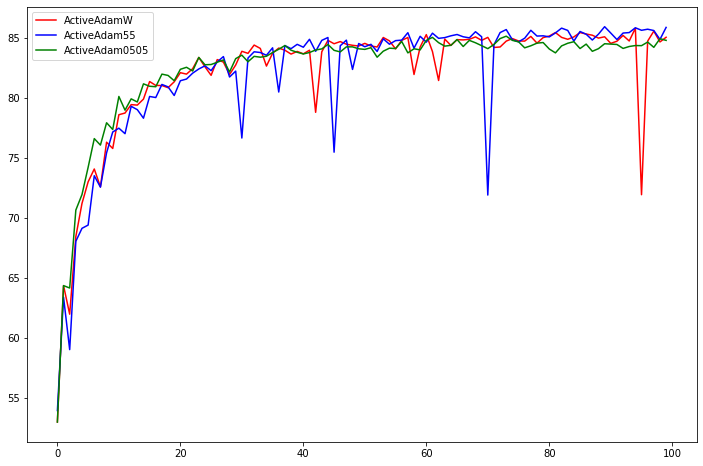

In [7]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
optims = ['ActiveAdamW','ActiveAdam55', 'ActiveAdam0505']
colors = ['red','blue', 'green']
alphas={
    0.01: 1,
    0.001: 1,
    0.0001: .4,
    1e-5: .5,
    1e-6: .2
}
for i, (optim, color) in enumerate(zip(optims, colors)):
    for lr in logs[optim].keys():
#         if lr==1e-5 or lr==1e-6: continue
        if lr!=0.001: continue
        r0 = logs[optim][lr][0].accs[:mini]
#         if i==0:
        ax.plot(r0, color=color, label=optim, alpha=alphas[lr])
#         else:
#             ax.plot(r0, color=color, label=lr)
        
#         ax.plot(r0, label='optim')
#         r1 = logs[optim][lr][1].accs[:mini]
#         r2 = logs[optim][lr][2].accs[:mini]
#         r3 = logs[optim][lr][3].accs[:mini]
#         r4 = logs[optim][lr][4].accs[:mini]
#         r5 = logs[optim][lr][5].accs[:mini]
#         r6 = logs[optim][lr][6].accs[:mini]
ax.legend()
#         lrs = np.stack([r0])
#         logs[optim][lr]['mean'] = lrs.mean(0)
#         logs[optim][lr]['std'] = lrs.std(0)
#         logs[optim][lr]['min'] = lrs.min(0)
#         logs[optim][lr]['max'] = lrs.max(0)    


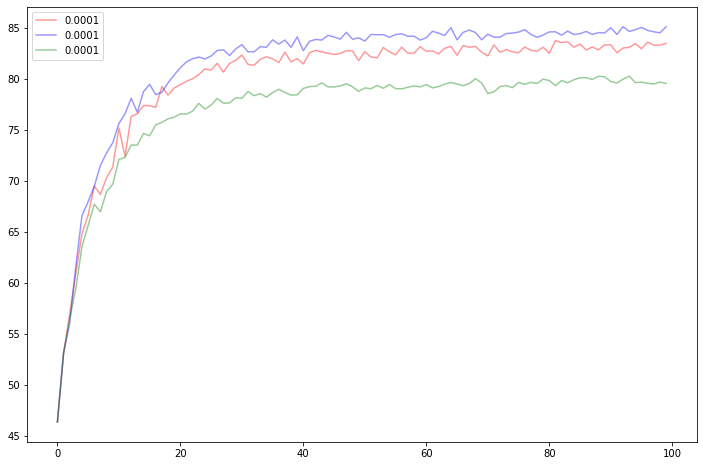

In [45]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
optims = ['ActiveAdamW','ActiveAdam55', 'ActiveAdam0505']
colors = ['red','blue', 'green']
alphas={
    0.01: 1,
    0.001: 1,
    0.0001: .4,
    1e-5: .5,
    1e-6: .2
}
for i, (optim, color) in enumerate(zip(optims, colors)):
    for lr in logs[optim].keys():
#         if lr==1e-5 or lr==1e-6: continue
        if lr!=0.0001: continue
        r0 = logs[optim][lr][0].accs[:mini]
#         if i==0:
        ax.plot(r0, color=color, label=lr, alpha=alphas[lr])
#         else:
#             ax.plot(r0, color=color, label=lr)
        
#         ax.plot(r0, label='optim')
#         r1 = logs[optim][lr][1].accs[:mini]
#         r2 = logs[optim][lr][2].accs[:mini]
#         r3 = logs[optim][lr][3].accs[:mini]
#         r4 = logs[optim][lr][4].accs[:mini]
#         r5 = logs[optim][lr][5].accs[:mini]
#         r6 = logs[optim][lr][6].accs[:mini]
ax.legend()
#         lrs = np.stack([r0])
#         logs[optim][lr]['mean'] = lrs.mean(0)
#         logs[optim][lr]['std'] = lrs.std(0)
#         logs[optim][lr]['min'] = lrs.min(0)
#         logs[optim][lr]['max'] = lrs.max(0)    


In [14]:
optim

'ActiveAdamW, ActiveAdam55'

## average and std of accuracy for each optimizer

In [21]:
for optim in logs.keys():
    for lr in logs[optim].keys():
        r0 = logs[optim][lr][0].accs[:mini]
        r1 = logs[optim][lr][1].accs[:mini]
        r2 = logs[optim][lr][2].accs[:mini]
        r3 = logs[optim][lr][3].accs[:mini]
        r4 = logs[optim][lr][4].accs[:mini]
        r5 = logs[optim][lr][5].accs[:mini]
        r6 = logs[optim][lr][6].accs[:mini]

        lrs = np.stack([r0,r1,r2,r3,r4,r5,r6])
        logs[optim][lr]['mean'] = lrs.mean(0)
        logs[optim][lr]['std'] = lrs.std(0)
        logs[optim][lr]['min'] = lrs.min(0)
        logs[optim][lr]['max'] = lrs.max(0)    


In [22]:
optim

'AdamW'

## plots

In [23]:
l = lambda : defaultdict(dict)
logs = defaultdict(l)
for file in logfiles:
    optim, lr, runNo = get_meta(file)
    logs[optim][lr][runNo] = Log(file)

In [26]:
for optim in logs.keys():
    for lr in [0.001,0.0001,1e-5,1e-6]:
        r0 = logs[optim][lr][0].accs[:mini]
        r1 = logs[optim][lr][1].accs[:mini]
        r2 = logs[optim][lr][2].accs[:mini]
        r3 = logs[optim][lr][3].accs[:mini]
        r4 = logs[optim][lr][4].accs[:mini]
        r5 = logs[optim][lr][5].accs[:mini]
        r6 = logs[optim][lr][6].accs[:mini]
    #     lrs = np.stack([lr1,lr2,lr3,lr4,lr5])
        lrs = np.stack([r0,r1,r2,r3,r4,r5,r6])
        logs[optim][lr]['mean'] = lrs.mean(0)
        logs[optim][lr]['std'] = lrs.std(0)
        logs[optim][lr]['min'] = lrs.min(0)
        logs[optim][lr]['max'] = lrs.max(0)    
    
#     print(lrs.shape)
#     print(logs[optim])

In [54]:
float('ActiveAdam-.5-.9'.split('-')[2])

0.9

In [168]:
logs[optim][1e-06][0]

In [9]:
for optim in logs.keys():
    for lr in [0.001,0.0001,1e-5,1e-6]:
        r0 = logs[optim][lr][0].train_losses[:mini]
        r1 = logs[optim][lr][1].train_losses[:mini]
        r2 = logs[optim][lr][2].train_losses[:mini]
        r3 = logs[optim][lr][3].train_losses[:mini]
        r4 = logs[optim][lr][4].train_losses[:mini]
        r5 = logs[optim][lr][5].train_losses[:mini]
        r6 = logs[optim][lr][6].train_losses[:mini]
    #     lrs = np.stack([lr1,lr2,lr3,lr4,lr5])
        lrs = np.stack([r0,r1,r2,r3,r4,r5,r6])
        logs[optim][lr]['mean_loss'] = lrs.mean(0)
        logs[optim][lr]['std_loss'] = lrs.std(0)
        logs[optim][lr]['min_loss'] = lrs.min(0)
        logs[optim][lr]['max_loss'] = lrs.max(0)    
    
#     print(lrs.shape)
#     print(logs[optim])

Text(0.04, 0.5, 'Accuracy')

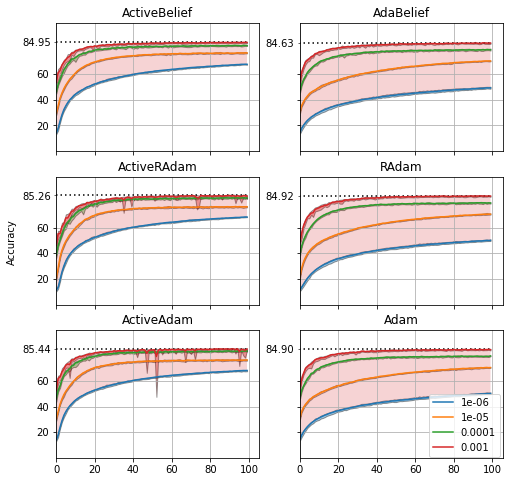

In [28]:
fig, axes = plt.subplots(3,2, sharey=False, sharex=True, figsize=(8,8))
for i, (ax, optim) in enumerate(zip(axes.flat, ['ActiveBelief', 'AdaBelief', 'ActiveRAdam', 'RAdam', 'ActiveAdamW', 'AdamW'])):
    if i%2==1:
        ax.set_yticklabels([])
    max_y = -float('inf')
    for lr in sorted([0.001,0.0001,1e-5,1e-6]):
        if lr==0.01: continue
        l, = ax.plot(logs[optim][lr]['mean'][:mini], label=lr)
        alpha=.4
        if 'W' in optim:
            ax.set_title(optim[:-1])
        else:
            ax.set_title(optim)
        max_y = max(max_y, max(logs[optim][lr]['mean'][:mini]))
        color = l.get_color()
        minn = logs[optim][lr]['min'][:mini]
        maxx = logs[optim][lr]['max'][:mini]
        mean = logs[optim][lr]['mean'][:mini]
        std = logs[optim][lr]['std'][:mini]
        ax.fill_between(range(mini), minn, maxx, 
                        alpha=alpha, edgecolor='black', facecolor=color)
    ax.set_yticks([max_y], minor=True)
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    ax.hlines(max_y, -5, mini, color='black', linestyle=(0,(1,2)))
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=0, top=100)
    ax.set_yticks([]+list(np.arange(20,80,20)))
    alpha=.2
    ax.fill_between(range(mini), logs[optim][1e-6]['mean'], logs[optim][0.001]['mean'], 
                        alpha=alpha, edgecolor='none', facecolor=color)
    ax.grid(b=True)
    if i==len(axes.flatten())-1:
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, loc=(.81,0.075))
#         ax.set_ylabel('Accuracy')
fig.text(0.04, 0.5, 'Accuracy', va='center', rotation='vertical')

In [21]:
fig.savefig('./plots/cifar10-comparative.png', dpi=300, bbox_inches='tight')

Text(0.04, 0.5, 'Train Loss')

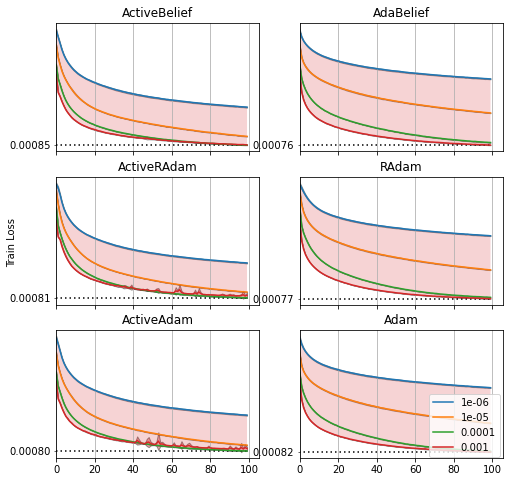

In [19]:
fig, axes = plt.subplots(3,2, sharey=False, sharex=True, figsize=(8,8))
for i, (ax, optim) in enumerate(zip(axes.flat, ['ActiveBelief', 'AdaBelief', 'ActiveRAdam', 'RAdam', 'ActiveAdamW', 'AdamW'])):
    if i%2==1:
        ax.set_yticklabels([])
    max_y = float('inf')
    for lr in sorted([0.001,0.0001,1e-5,1e-6]):
        if lr==0.01: continue
        l, = ax.plot(logs[optim][lr]['mean_loss'][:mini], label=lr)
        alpha=.4
        if 'W' in optim:
            ax.set_title(optim[:-1])
        else:
            ax.set_title(optim)
        max_y = min(max_y, min(logs[optim][lr]['mean_loss'][:mini]))
        color = l.get_color()
        minn = logs[optim][lr]['min_loss'][:mini]
        maxx = logs[optim][lr]['max_loss'][:mini]
        mean = logs[optim][lr]['mean_loss'][:mini]
        std = logs[optim][lr]['std_loss'][:mini]
        ax.fill_between(range(mini), mean-std, mean+std, 
                        alpha=alpha, edgecolor='black', facecolor=color)
    ax.set_yticks([max_y], minor=True)
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%.5f"))
    ax.hlines(max_y, -5, mini, color='black', linestyle=(0,(1,2)))
    ax.set_xlim(left=0)
#     ax.set_ylim(bottom=0, top=100)
    ax.set_yticks([]+list(np.arange(20,80,20)))
    alpha=.2
    ax.fill_between(range(mini), logs[optim][0.001]['mean_loss'], logs[optim][1e-6]['mean_loss'], 
                        alpha=alpha, edgecolor='none', facecolor=color)
    ax.grid(b=True)
    if i==len(axes.flatten())-1:
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, loc=(.81,0.075))
#         ax.set_ylabel('Accuracy')
fig.text(0.04, 0.5, 'Train Loss', va='center', rotation='vertical')

# mean std

In [152]:
for optim in logs.keys():
    lr1 = logs[optim][0.01]['mean'][:mini]
    lr2 = logs[optim][0.001]['mean'][:mini]
    lr3 = logs[optim][0.0001]['mean'][:mini]
    lr4 = logs[optim][1e-5]['mean'][:mini]
    lr5 = logs[optim][1e-6]['mean'][:mini]

    lrs = np.stack([lr2,lr3,lr4,lr5])
    logs[optim]['mean'] = lrs.mean(0)
    logs[optim]['std'] = lrs.std(0)
    logs[optim]['min'] = lrs.min(0)
    logs[optim]['max'] = lrs.max(0)    
    

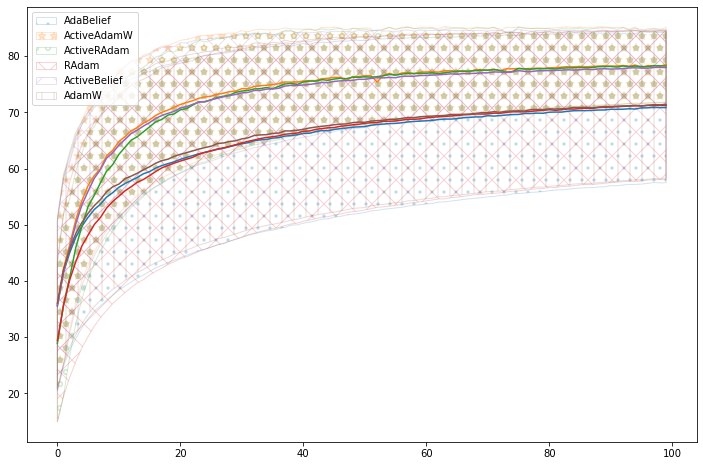

In [153]:
fig, ax = plt.subplots(1,1, sharey=True, figsize=[12,8])
hatches = {
    'ActiveAdamW': '*',
    'AdaBelief': '.',
    'AdamW': '|',
    'RAdam': 'X',
    'ActiveRAdam': 'o',
    'ActiveBelief': 'x'
}
polys=[]
optims=[]
for i, optim in enumerate(logs.keys()):
    mean = logs[optim]['mean']
    std = logs[optim]['std']
    minn = logs[optim]['min']
    maxx = logs[optim]['max']
    l, = ax.plot(mean, label=optim)
    color = l.get_color()
    if optim=='ActiveAdamW':
        alpha=.2
    else:
        alpha=.2
    poly =ax.fill_between(range(mini), mean-std, mean+std, alpha=alpha, edgecolor=color, facecolor='none', hatch=hatches[optim])
    polys.append(poly)
    optims.append(optim)
ax.legend(polys, optims)

In [154]:
for i, (optim, ax) in enumerate(zip(optims, axes.flatten())):
    print(optim)

AdaBelief
ActiveAdamW
ActiveRAdam


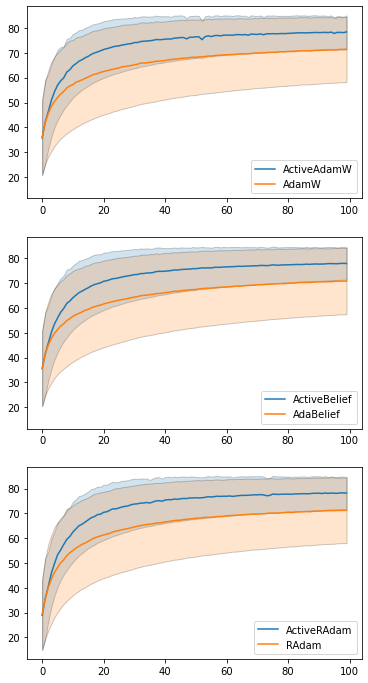

In [155]:
fig, axes = plt.subplots(3,1, sharey=True, figsize=[6,12])
hatches = {
    'ActiveAdamW': '*',
    'AdaBelief': '.',
    'AdamW': '|',
    'RAdam': 'X',
    'ActiveRAdam': 'o',
    'ActiveBelief': 'x'
}
polys=[]
optims=[('ActiveAdamW', 'AdamW'), ('ActiveBelief', 'AdaBelief'), ('ActiveRAdam', 'RAdam')]
for i, (optim, ax) in enumerate(zip(optims, axes.flatten())):
    optimA = optim[0]
    optimV = optim[1]
    meanA = logs[optimA]['mean']
    stdA = logs[optimA]['std']
    minnA = logs[optimA]['min']
    maxxA = logs[optimA]['max']
    
    meanV = logs[optimV]['mean']
    stdV = logs[optimV]['std']
    minnV = logs[optimV]['min']
    maxxV = logs[optimV]['max']
    
    lA, = ax.plot(meanA, label=optimA)
    lV, = ax.plot(meanV, label=optimV)
    colorA = lA.get_color()
    colorV = lV.get_color()

    alphaA=.2
    alphaV=.2
    
    polyA=ax.fill_between(range(mini), meanA-stdA, meanA+stdA, alpha=alphaA, edgecolor='black', facecolor=colorA)
    polyV=ax.fill_between(range(mini), meanV-stdV, meanV+stdV, alpha=alphaV, edgecolor='black', facecolor=colorV)
#     polys.append(poly)
#     optims.append(optim)
    ax.legend(loc='lower right')

# separate plots

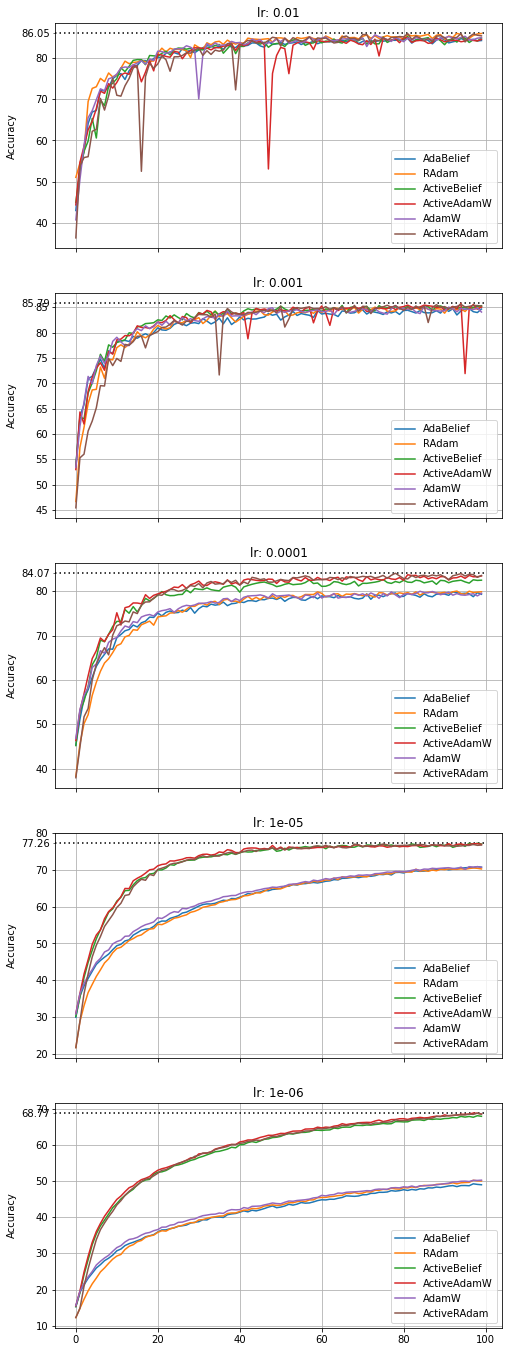

In [68]:
fig, axes = plt.subplots(5,1, sharex=True, figsize=(8,24))
for i, (lr, ax) in enumerate(zip(sorted(logs['AdamW'].keys(), reverse=True)[0:], axes)):
    max_y = 0
    for optim in logs.keys():
        ax.plot(logs[optim][lr].accs[:mini], label=optim)
        
        # plotting max horizontal line
        max_y = max(max(logs[optim][lr].accs[:mini]), max_y)
        
        ax.legend(loc='lower right')
        ax.set_title(f'lr: {lr}')
        ax.grid(b=True)
        ax.set_xlim(left=-5.)
    ax.set_yticks([max_y], minor=True)
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    ax.hlines(max_y, -5, mini, color='black', linestyle=(0,(1,2)))
    ax.set_ylabel('Accuracy')
# plt.tight_layout()

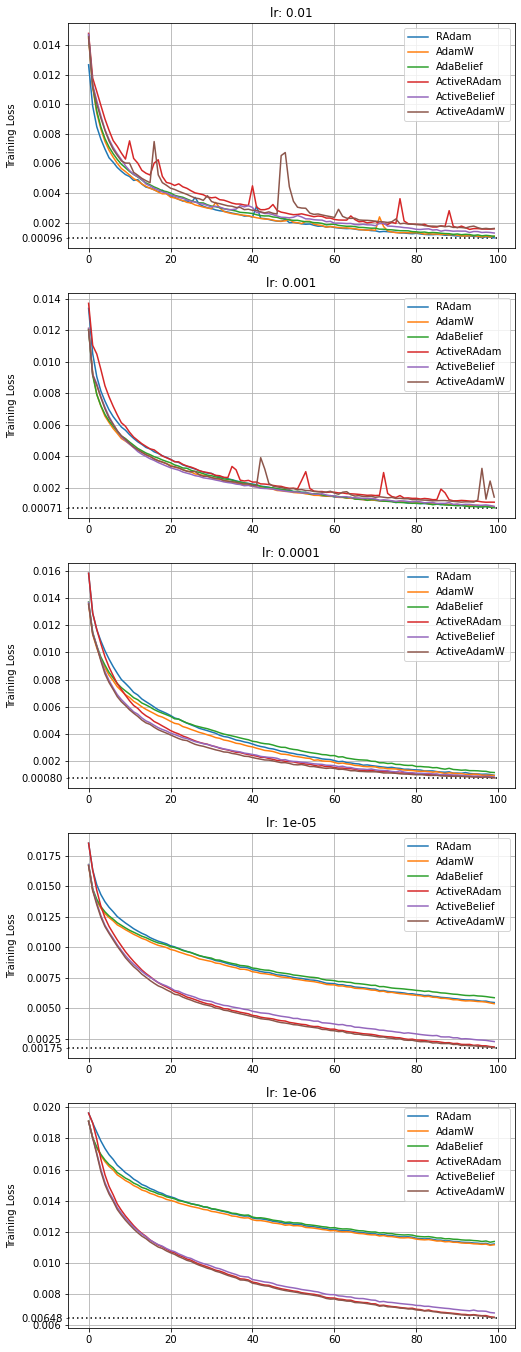

In [69]:
fig, axes = plt.subplots(5,1, sharex=False, figsize=(8,24))
for i, (lr, ax) in enumerate(zip(sorted(logs['AdamW'].keys(), reverse=True)[0:], axes)):
    min_y = float('inf')
    for optim in sorted(logs.keys(), reverse=True):
        ax.plot(logs[optim][lr].train_losses[:mini], label=optim)
        
        # plotting max horizontal line
        min_y = min(min(logs[optim][lr].train_losses[:mini]), min_y)
        
        ax.legend(loc='upper right')
        ax.set_title(f'lr: {lr}')
        ax.grid(b=True)
        ax.set_xlim(left=-5.)
    ax.set_yticks([min_y], minor=True)
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%.5f"))
    ax.hlines(min_y, -5, mini, color='black', linestyle=(0,(1,2)))
    ax.set_ylabel('Training Loss')
# plt.tight_layout()

In [35]:
logs['Adabelief']

{0.001: <__main__.Log at 0x7fe96ce77390>,
 1e-05: <__main__.Log at 0x7fe96dd1e2d0>,
 0.0001: <__main__.Log at 0x7fe96f340390>}